In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('eda_data.csv')

In [3]:
data.head()

,job_title,rating,founded,type_of_ownership,industry,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,job_state,age,new_description,tool_python,tool_r_studio,tool_r-studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size,revenue,job_simplified,seniority
0,Data Scientist (Remote),3.6,-1,Company - Private,Investment Banking & Asset Management,0,0,75,176,125.5,Manufacturers Bank,CA,-1,NEW DIGITAL BANK MISSION STATEMENT: Join us on...,1,0,0,1,0,0,0,1,0,0,201+,$50 to $100 million,data scientist,na
1,Senior Data Scientist,3.6,2014,Company - Private,Internet,0,0,98,200,149.0,Shift,CA,8,About Shift: We believe car buying should be f...,1,0,0,1,1,1,0,1,0,1,1001+,Unknown / Non-Applicable,data scientist,senior
2,Principal Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,150,180,165.0,CEDENT,TN,-1,- Role - Principal Data Scientist Location Nas...,1,0,0,1,1,0,0,0,0,0,1+,Less than $1 million,data scientist,senior
3,Sr Data Scientist,-1.0,-1,Contract,Computer Hardware & Software,0,1,100,135,117.5,CEDENT,GA,-1,"Title: :Sr Data Scientist Atlanta, GA Terms of...",1,0,0,1,1,0,0,1,1,1,1+,Less than $1 million,data scientist,senior
4,Sr. Data Scientist,-1.0,-1,Unknown,Unknown,1,1,170,170,85.0,Spotline Inc,Remote,-1,Responsibilities: Ability to demonstrate algor...,0,0,0,0,1,0,0,0,0,0,Unknown,Unknown / Non-Applicable,data scientist,senior


In [4]:
data = data.drop(data[data.type_of_ownership == 'Nonprofit Organization'].index)

In [5]:
data[data.type_of_ownership == 'Nonprofit Organization']

,job_title,rating,founded,type_of_ownership,industry,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,job_state,age,new_description,tool_python,tool_r_studio,tool_r-studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size,revenue,job_simplified,seniority


In [6]:
df_model = data[['avg_salary', 'rating', 'company_size', 'type_of_ownership', 'industry', 'revenue', 'hourly', 'employer_provided', 'job_state', 'age', 'tool_python', 'tool_r_studio', 'tool_spark', 'tool_aws', 'tool_excel', 'tool_matlab', 'tool_tableau', 'tool_powerbi', 'tool_sql', 'job_simplified', 'seniority']]

In [7]:
df_dummy = pd.get_dummies(df_model)

In [8]:
df_dummy.head()

,avg_salary,rating,hourly,employer_provided,age,tool_python,tool_r_studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size_1+,company_size_10000+,company_size_1001+,company_size_201+,company_size_5001+,company_size_501+,company_size_51+,company_size_Unknown,type_of_ownership_College / University,type_of_ownership_Company - Private,type_of_ownership_Company - Public,type_of_ownership_Contract,type_of_ownership_Government,type_of_ownership_Subsidiary or Business Segment,type_of_ownership_Unknown,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Audiovisual,industry_Biotech & Pharmaceuticals,industry_Brokerage Services,industry_Colleges & Universities,industry_Computer Hardware & Software,industry_Consumer Products Manufacturing,"industry_Department, Clothing, & Shoe Stores",industry_Energy,industry_Enterprise Software & Network Solutions,industry_Federal Agencies,industry_Financial Analytics & Research,industry_Financial Transaction Processing,industry_Food & Beverage Manufacturing,industry_Gambling,industry_Gas Stations,industry_Grocery Stores & Supermarkets,industry_Health Care Services & Hospitals,industry_IT Services,industry_Insurance Agencies & Brokerages,industry_Insurance Carriers,industry_Internet,industry_Investment Banking & Asset Management,industry_Lending,industry_Motion Picture Production & Distribution,industry_Oil & Gas Services,industry_Real Estate,industry_Sports & Recreation,industry_Staffing & Outsourcing,industry_TV Broadcast & Cable Networks,industry_Telecommunications Services,industry_Transportation Equipment Manufacturing,industry_Travel Agencies,industry_Unknown,industry_Video Games,revenue_$1 to $2 billion,revenue_$1 to $5 million,revenue_$10 to $25 million,revenue_$10+ billion,revenue_$100 to $500 million,revenue_$2 to $5 billion,revenue_$25 to $50 million,revenue_$5 to $10 billion,revenue_$5 to $10 million,revenue_$50 to $100 million,revenue_$500 million to $1 billion,revenue_Less than $1 million,revenue_Unknown / Non-Applicable,job_state_AZ,job_state_CA,job_state_CO,job_state_DC,job_state_FL,job_state_GA,job_state_IL,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_ME,job_state_MO,job_state_NC,job_state_NJ,job_state_NV,job_state_NY,job_state_OR,job_state_PA,job_state_Remote,job_state_TN,job_state_TX,job_state_Unknown,job_state_VA,job_state_VT,job_state_WA,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_machine learning engineer,job_simplified_manager,job_simplified_na,seniority_entry,seniority_junior,seniority_na,seniority_senior
0,125.5,3.6,0,0,-1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,149.0,3.6,0,0,8,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,165.0,-1.0,0,1,-1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,117.5,-1.0,0,1,-1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,85.0,-1.0,1,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_dummy.drop('avg_salary', axis = 1)

In [11]:
X.head()

,rating,hourly,employer_provided,age,tool_python,tool_r_studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size_1+,company_size_10000+,company_size_1001+,company_size_201+,company_size_5001+,company_size_501+,company_size_51+,company_size_Unknown,type_of_ownership_College / University,type_of_ownership_Company - Private,type_of_ownership_Company - Public,type_of_ownership_Contract,type_of_ownership_Government,type_of_ownership_Subsidiary or Business Segment,type_of_ownership_Unknown,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Audiovisual,industry_Biotech & Pharmaceuticals,industry_Brokerage Services,industry_Colleges & Universities,industry_Computer Hardware & Software,industry_Consumer Products Manufacturing,"industry_Department, Clothing, & Shoe Stores",industry_Energy,industry_Enterprise Software & Network Solutions,industry_Federal Agencies,industry_Financial Analytics & Research,industry_Financial Transaction Processing,industry_Food & Beverage Manufacturing,industry_Gambling,industry_Gas Stations,industry_Grocery Stores & Supermarkets,industry_Health Care Services & Hospitals,industry_IT Services,industry_Insurance Agencies & Brokerages,industry_Insurance Carriers,industry_Internet,industry_Investment Banking & Asset Management,industry_Lending,industry_Motion Picture Production & Distribution,industry_Oil & Gas Services,industry_Real Estate,industry_Sports & Recreation,industry_Staffing & Outsourcing,industry_TV Broadcast & Cable Networks,industry_Telecommunications Services,industry_Transportation Equipment Manufacturing,industry_Travel Agencies,industry_Unknown,industry_Video Games,revenue_$1 to $2 billion,revenue_$1 to $5 million,revenue_$10 to $25 million,revenue_$10+ billion,revenue_$100 to $500 million,revenue_$2 to $5 billion,revenue_$25 to $50 million,revenue_$5 to $10 billion,revenue_$5 to $10 million,revenue_$50 to $100 million,revenue_$500 million to $1 billion,revenue_Less than $1 million,revenue_Unknown / Non-Applicable,job_state_AZ,job_state_CA,job_state_CO,job_state_DC,job_state_FL,job_state_GA,job_state_IL,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_ME,job_state_MO,job_state_NC,job_state_NJ,job_state_NV,job_state_NY,job_state_OR,job_state_PA,job_state_Remote,job_state_TN,job_state_TX,job_state_Unknown,job_state_VA,job_state_VT,job_state_WA,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_machine learning engineer,job_simplified_manager,job_simplified_na,seniority_entry,seniority_junior,seniority_na,seniority_senior
0,3.6,0,0,-1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3.6,0,0,8,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-1.0,0,1,-1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-1.0,0,1,-1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,-1.0,1,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [12]:
X.to_csv('test_data.csv', index = None)

In [13]:
y = df_dummy['avg_salary'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train

,rating,hourly,employer_provided,age,tool_python,tool_r_studio,tool_spark,tool_aws,tool_excel,tool_matlab,tool_tableau,tool_powerbi,tool_sql,company_size_1+,company_size_10000+,company_size_1001+,company_size_201+,company_size_5001+,company_size_501+,company_size_51+,company_size_Unknown,type_of_ownership_College / University,type_of_ownership_Company - Private,type_of_ownership_Company - Public,type_of_ownership_Contract,type_of_ownership_Government,type_of_ownership_Subsidiary or Business Segment,type_of_ownership_Unknown,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Audiovisual,industry_Biotech & Pharmaceuticals,industry_Brokerage Services,industry_Colleges & Universities,industry_Computer Hardware & Software,industry_Consumer Products Manufacturing,"industry_Department, Clothing, & Shoe Stores",industry_Energy,industry_Enterprise Software & Network Solutions,industry_Federal Agencies,industry_Financial Analytics & Research,industry_Financial Transaction Processing,industry_Food & Beverage Manufacturing,industry_Gambling,industry_Gas Stations,industry_Grocery Stores & Supermarkets,industry_Health Care Services & Hospitals,industry_IT Services,industry_Insurance Agencies & Brokerages,industry_Insurance Carriers,industry_Internet,industry_Investment Banking & Asset Management,industry_Lending,industry_Motion Picture Production & Distribution,industry_Oil & Gas Services,industry_Real Estate,industry_Sports & Recreation,industry_Staffing & Outsourcing,industry_TV Broadcast & Cable Networks,industry_Telecommunications Services,industry_Transportation Equipment Manufacturing,industry_Travel Agencies,industry_Unknown,industry_Video Games,revenue_$1 to $2 billion,revenue_$1 to $5 million,revenue_$10 to $25 million,revenue_$10+ billion,revenue_$100 to $500 million,revenue_$2 to $5 billion,revenue_$25 to $50 million,revenue_$5 to $10 billion,revenue_$5 to $10 million,revenue_$50 to $100 million,revenue_$500 million to $1 billion,revenue_Less than $1 million,revenue_Unknown / Non-Applicable,job_state_AZ,job_state_CA,job_state_CO,job_state_DC,job_state_FL,job_state_GA,job_state_IL,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_ME,job_state_MO,job_state_NC,job_state_NJ,job_state_NV,job_state_NY,job_state_OR,job_state_PA,job_state_Remote,job_state_TN,job_state_TX,job_state_Unknown,job_state_VA,job_state_VT,job_state_WA,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_machine learning engineer,job_simplified_manager,job_simplified_na,seniority_entry,seniority_junior,seniority_na,seniority_senior
744,4.0,0,0,11,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
287,4.4,0,0,7,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
166,4.0,0,0,35,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
960,4.3,0,0,18,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
494,4.1,0,0,50,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [16]:
#Multiple Linear Regression
import statsmodels.api as sm

X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm)

model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     6.035
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           6.29e-51
Time:                        11:57:39   Log-Likelihood:                -4134.2
No. Observations:                 998   AIC:                             8464.
Df Residuals:                     900   BIC:                             8945.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                66.3883      7.185      9.240      0.000      52.287      80.490
rating                                               -0.8360      1.249     -0.669      0.503      -3.287       1.615
hourly                                              -52.7147      3.256    -16.190      0.000     -59.105     -46.324
employer_provided                                    -7.0480      6.522     -1.081      0.280     -19.848       5.752
age                                                   0.1387      0.060      2.329      0.020       0.022       0.256
tool_python                                           5.8505      4.047      1.446      0.149      -2.092      13.793
tool_r_studio                                        27.2219     14.194      1.918      0.055      -0.635      55.078
tool_spark                                           -4.6851      2.310     -2.028      0.043      -9.219      -0.151
tool_aws                                             -0.9499      3.060     -0.310      0.756      -6.955       5.056
tool_excel                                           -3.7737      2.216     -1.703      0.089      -8.124       0.576
tool_matlab                                         -11.1557     10.261     -1.087      0.277     -31.293       8.982
tool_tableau                                         -1.0386      3.872     -0.268      0.789      -8.638       6.561
tool_powerbi                                         14.1392     18.522      0.763      0.445     -22.212      50.490
tool_sql                                              6.3989      2.886      2.217      0.027       0.735      12.062
company_size_1+                                      22.6677      5.111      4.435      0.000      12.637      32.698
company_size_10000+                                  -0.3522      7.022     -0.050      0.960     -14.133      13.429
company_size_1001+                                   16.9183      4.895      3.456      0.001       7.311      26.526
company_size_201+                                    11.0934      8.333      1.331      0.183      -5.260      27.447
company_size_5001+                                  -27.3980     11.098     -2.469      0.014     -49.179      -5.617
company_size_501+                                     9.7331      5.572      1.747      0.081      -1.202      20.668
company_size_51+                                     14.9221      6.812      2.191      0.029       1.553      28.291
company_size_Unknown                                 18.8039      9.390      2.002      0.046       0.375      37.233
type_of_ownership_College / University                2.8552      3.610      0.791      0.429      -4.230       9.940
type_of_ownersh

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-15.07632398594103

In [18]:
# Lasso Regression
from sklearn.linear_model import Lasso

lm_lasso = Lasso(alpha = .02)

lm_lasso.fit(X_train, y_train)

np.mean(cross_val_score(lm_lasso, X_train, y_train,  scoring = 'neg_mean_absolute_error', cv = 3))

-14.497568995770377

C:\Users\dinhd\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.383e+02, tolerance: 2.043e+01
  model = cd_fast.enet_coordinate_descent(


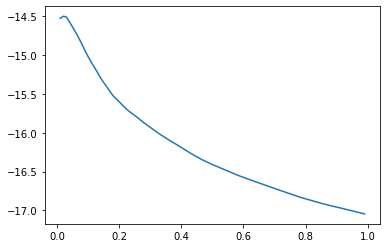

In [19]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lm_l = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

plt.plot(alpha, error)
    

In [20]:
err = tuple(zip(alpha, error))

In [21]:
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])

In [22]:
df_err.iloc[df_err['error'].idxmax()]

alpha     0.020000
error   -14.497569
Name: 1, dtype: float64

In [23]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-13.746537676492752

In [24]:
# Model tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 
              'criterion': ('squared_error', 'absolute_error'), 
              'max_features': ('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [25]:
gs.best_score_

-13.661973546229362

In [26]:
gs.best_estimator_

RandomForestRegressor(n_estimators=10)

In [27]:
gs.best_params_

{'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 10}

In [28]:
lm_pred = lm.predict(X_test)
lml_pred = lm_lasso.predict(X_test)
rf_pred = gs.best_estimator_.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, lm_pred))
print(mean_absolute_error(y_test, lml_pred))
print(mean_absolute_error(y_test, rf_pred))

14.790639665683624
14.517454524126576
13.503605175872776


In [30]:
import pickle

filename = 'prediction_model.p'
pickle.dump(gs.best_estimator_, open(filename, 'wb'))